In [15]:
import pandas as pd
import datetime
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)


# Set period with the starting and ending day

start_date = date(2022, 1, 1)
end_date = date(2023, 2,18)

df = pd.DataFrame()
for single_date in daterange(start_date, end_date):
    dfs = pd.read_html(f'https://www.xe.com/currencytables/?from=CHF&date={single_date.strftime("%Y-%m-%d")}')[0]
    dfs['Date'] = single_date.strftime("%Y-%m-%d")
    df = df.append(dfs)


columns = ['Currency code', 'Currency name', 'Units per CHF', 'CHF per Unit', 'Date']

df_chf=df.loc[df['Currency']=='EUR']


df_chf.to_csv('exchange_rate_chf.csv')

In [16]:
df_chf.head()

,Currency,Name,Units per CHF,CHF per unit,Date
1,EUR,Euro,0.964489,1.036819,2022-01-01
1,EUR,Euro,0.964887,1.036391,2022-01-02
1,EUR,Euro,0.964100,1.037236,2022-01-03
1,EUR,Euro,0.967076,1.034045,2022-01-04
1,EUR,Euro,0.963140,1.038271,2022-01-05


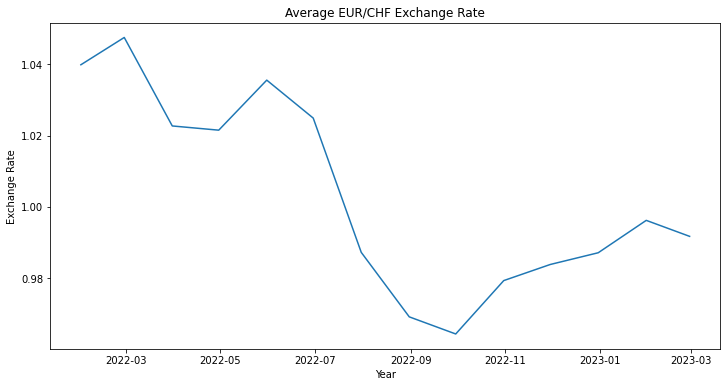

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the exchange rate data
df = pd.read_csv('exchange_rate_chf.csv', parse_dates=['Date'], index_col='Date')

# Resample the data to a monthly frequency and compute the average exchange rate for each month
monthly_avg = df['CHF per unit'].resample('M').mean()

# Plot the time series

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(monthly_avg)
plt.title('Average EUR/CHF Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.show()


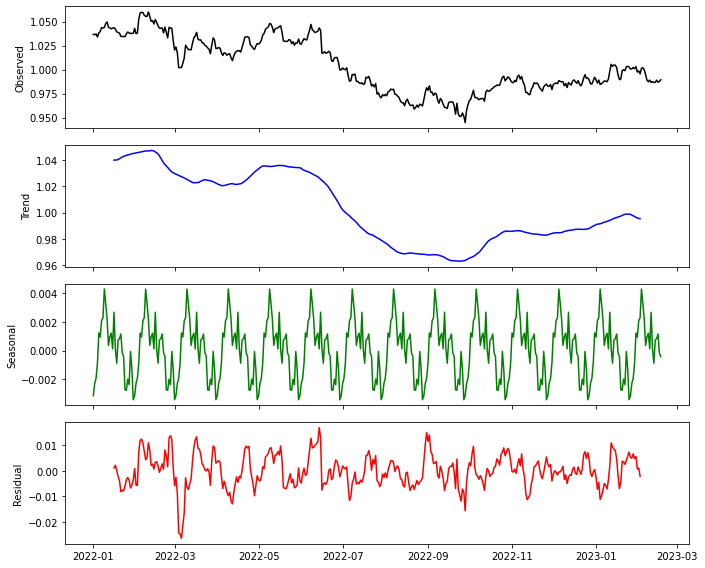

In [18]:

from statsmodels.tsa.seasonal import seasonal_decompose


# Perform seasonal decomposition
decomposition = seasonal_decompose(df['CHF per unit'], model='additive', period=30)

# Plot the decomposed time series
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
axes[0].set_ylabel('Observed')
axes[0].plot(df['CHF per unit'], color='black')
axes[1].set_ylabel('Trend')
axes[1].plot(decomposition.trend, color='blue')
axes[2].set_ylabel('Seasonal')
axes[2].plot(decomposition.seasonal, color='green')
axes[3].set_ylabel('Residual')
axes[3].plot(decomposition.resid, color='red')
plt.tight_layout()
plt.show()


We observe a drecreasing trend in euro to chf exchange rate.

***There are many factors that can affect the exchange rate between two currencies, but a few possible reasons for the decreasing trend in EUR/CHF exchange rate are:***

***Central bank interventions***: Central banks can influence exchange rates by buying or selling currencies in the foreign exchange market. In the past, the Swiss National Bank (SNB) has intervened to weaken the franc against the euro in order to support Swiss exports and the economy. However, in recent years, the SNB has been less active in currency markets, which may have contributed to the strengthening of the franc against the euro.

***Economic performance:*** Economic indicators such as GDP growth, inflation, and interest rates can affect exchange rates. For example, if the Swiss economy is performing better than the eurozone economy, investors may demand more Swiss francs, leading to an increase in the exchange rate.

***Political events:*** Political events such as elections, referendums, and geopolitical tensions can affect exchange rates by increasing uncertainty and risk. For example, if there is political instability in the eurozone, investors may sell euros and buy Swiss francs as a safe haven asset, leading to an increase in the exchange rate.

***It's possible that the ongoing Russian-Ukrainian conflict could have an impact on the exchange rate between the euro and Swiss franc, as political and economic uncertainty can cause fluctuations in currency values.*** 


***Market sentiment:*** Market sentiment can also play a role in exchange rate movements, as investors may react to news, rumors, or changes in sentiment. For example, if investors believe that the euro is overvalued, they may sell euros and buy Swiss francs, leading to a decrease in the exchange rate.